<a href="https://colab.research.google.com/github/Aleksandr6669/www/blob/master/quickstarts/Get_started_Veo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with Video generation using Veo

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_Veo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

<!-- Princing warning Badge -->
<table>
  <tr>
    <!-- Emoji -->
    <td bgcolor="#f5949e">
      <font size=30>⚠️</font>
    </td>
    <!-- Text Content Cell -->
    <td bgcolor="#f5949e">
      <h3><font color=black>Veo is a paid only feature. It won't run with the Free Tier.<br>  
Running all examples in this notebook costs over <strong>10$</strong> (cf. <a href="https://ai.google.dev/pricing#veo2"><font color='#217bfe'>pricing</font></a> for more details).</font></h3>
    </td>
  </tr>
</table>

In [ ]:
# Change that value if you want to run the colab
I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab = False # @param {type:"boolean"}

[Veo](https://ai.google.dev/gemini-api/docs/models#veo-2) is our most capable video generation model, designed for high-quality video generation across a wide range of industries and use cases. Targeting creative professionals, marketers, advertisers, and everyday consumers alike, Veo empowers users to create photorealistic videos with incredible detail and far fewer distracting artifacts than our previous models. It generates videos in resolutions up to 720p, opening up new possibilities for storytelling, social sharing, advertising, and more.

## Why Veo?
* **Highest quality text-to-video model**: Veo generates photorealistic videos with incredible detail, minimal artifacts, and extended durations in resolutions up to 720p.
* **Advanced language understanding**: Veo deeply understands natural language and visual semantics, capturing the nuance and tone of complex prompts to render intricate details in extended scenes, including cinematic terms like "timelapse" or "aerial shots."
* **Unprecedented creative control**: Veo provides an unprecedented level of creative control, understanding prompts for all kinds of cinematic effects, like timelapses or aerial shots of a landscape.

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
%pip install -U -q "google-genai>1.8.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.8 MB/s eta 0:00:00


### Setup your API key and initialize client

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata
from google import genai

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

## Text-to-video

Veo is able to generate videos from text prompts (see in the code comments for ideas).

### Prompting Tips for Veo
To get the most out of Veo, consider incorporating specific video terminology into your prompts  Veo understands a wide range of terms related to:

* **Shot composition**: Specify the framing and number of subjects in the shot (e.g., "*single shot*", "*two shot*", "*over-the-shoulder shot*").
* **Camera positioning and movement**:  Control the camera's location and movement using terms like "*eye level*", "*high angle*", "*worms eye*", "*dolly shot*", "*zoom shot*", "*pan shot," and "*tracking shot*".
* **Focus and lens effects**:  Use terms like "*shallow focus*", "*deep focus*", "*soft focus*", "*macro lens*", and "*wide-angle lens*" to achieve specific visual effects.
* **Overall style and subject**: Guide Veo's creative direction by specifying styles like "*sci-fi*", "*romantic comedy*", "*action movie*" or "*animation*". You can also describe the subjects and backgrounds you want, such as "*cityscape*", "*nature*", "*vehicles*", or "animals."

Check the [Veo prompt guide](https://ai.google.dev/gemini-api/docs/video/veo-prompt-guide) for more details and tips.

### Optional parameters
The prompt is the only mandatory parameters, the others are all optional.

* **negative_prompt**: What you don't want to see in the video
* **person_generation**: Tell you model if it's allowed to generate adults in the videos or not. Children are always blocked.
* **aspect_ratio**: Aspect ratio of the video. Accepted values are "16:9" (landscape) and "9:16" (portrait).
* **number_of_videos**: Number of videos generated (1 to 2).
* **duration_seconds**: The duration of the video in seconds (5 to 8)


It takes about a minute for the videos to be generated.

In [38]:
if not I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab:
  print("Veo is a paid feature. Please change the variable 'I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab' to True if you are okay with paying to run it.")

else:
  import time
  from google.genai import types
  from IPython.display import Video

  prompt = "Кот" # @param {type: "string"}

  # Here are a few prompts to help you get started and spark your creativity:
  # 1. Wide shot of a futuristic cityscape at dawn. Flying vehicles zip between skyscrapers. Camera pans across the skyline as the sun rises.
  # 2. A close up of a thief's gloved hand that reaches for a priceless diamond necklace in a museum display case. Camera slowly tracks the hand, with dramatic lighting and shadows.
  # 3. A giant, friendly robot strolls through a field of wildflowers, butterflies fluttering around its head. Camera tilts upwards as the robot looks towards the sky.
  # 4. A single, perfectly ripe apple hangs from a branch. It is covered in dew. A gentle breeze sways the branch, causing the apple to rotate slowly.
  # 5. A beehive nestled in a hollow tree trunk in a magical forest. Bees fly in and out of the hive, carrying pollen and nectar
  # 6. In a beautiful field of flowers, show a cute bunny that is slowly revealed to be an eldritch horror from outside time and space.

  # Optional parameters
  negative_prompt = "" # @param {type: "string"}
  person_generation = "allow_adult"  # @param ["dont_allow", "allow_adult"]
  aspect_ratio = "16:9" # @param ["16:9", "9:16"]
  number_of_videos = 1 # @param {type:"slider", min:1, max:4, step:1}
  duration = 8 # @param {type:"slider", min:5, max:8, step:1}

  operation = client.models.generate_videos(
      model="veo-2.0-generate-001",
      prompt=prompt,
      config=types.GenerateVideosConfig(
        # At the moment the config must not be empty
        person_generation=person_generation,
        aspect_ratio=aspect_ratio,  # 16:9 or 9:16
        number_of_videos=number_of_videos, # supported value is 1-4
        negative_prompt=negative_prompt,
        duration_seconds=duration, # supported value is 5-8
      ),
  )

  # Waiting for the video(s) to be generated
  while not operation.done:
      time.sleep(20)
      operation = client.operations.get(operation)
      print(operation)

  print(operation.result.generated_videos)

  for n, generated_video in enumerate(operation.result.generated_videos):
    client.files.download(file=generated_video.video)
    generated_video.video.save(f'video{n}.mp4') # Saves the video(s)
    display(generated_video.video.show()) # Displays the video(s) in a notebook

Veo is a paid feature. Please change the variable 'I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab' to True if you are okay with paying to run it.


## Image-to-video

You can also generate images from an base image and a prompt. Here are two exemples, one in which you provide the image and one in which you will use Imagen3 to generate it.


### Using your own images

If you want to use your own image, upload it to colab by clicking on the **folder icon** in the left menu (it should be the 5th choice), then on the **upload icon** (the first one) at the top of left left panel that should have been opened.

Your images should be uploaded in the `/content` folder of this colab instance.

Or you can also using this code to upload your image:

In [ ]:
import os

from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  os.rename(fn, 'image.jpg')

Saving image (6).png to image (6).png


Now that you have your own image, you can add it to your Veo prompt.

If you don't know what to prompt about your image, keep the prompt empty and the model will figure out what to generate.


In [40]:
if not I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab:
  print("Veo is a paid feature. Please change the variable 'I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab' to True if you are okay with paying to run it.")

else:
  from PIL import Image
  import io

  prompt = "" # @param {"type":"string","placeholder":"Write your owm prompt of leave empty to let the model decide"}
  image_name = "" # @param {type: "string", "placeholder":"Enter the name of your image or leave empty for the one you just uploaded."}

  # Optional parameters
  negative_prompt = "ugly, low quality" # @param {type: "string"}
  aspect_ratio = "16:9" # @param ["16:9", "9:16"]
  number_of_videos = 1 # @param {type:"slider", min:1, max:4, step:1}
  duration = 8 # @param {type:"slider", min:5, max:8, step:1}

  # Loading the image
  if image_name=="":
    image_name = "image.jpg"
  im = Image.open(image_name)

  # converting the image to bytes
  image_bytes_io = io.BytesIO()
  im.save(image_bytes_io, format=im.format)
  image_bytes = image_bytes_io.getvalue()

  operation = client.models.generate_videos(
      model="veo-2.0-generate-001",
      prompt=prompt,
      image=types.Image(image_bytes=image_bytes, mime_type=im.format),
      config=types.GenerateVideosConfig(
        # At the moment the config must not be empty
        aspect_ratio = aspect_ratio,  # 16:9 or 9:16
        number_of_videos = number_of_videos, # supported value is 1-4
        negative_prompt = negative_prompt,
        duration_seconds = duration, # supported value is 5-8
      ),
  )

  # Waiting for the video(s) to be generated
  while not operation.done:
      time.sleep(20)
      operation = client.operations.get(operation)
      print(operation)

  print(operation.result.generated_videos)

  for n, generated_video in enumerate(operation.result.generated_videos):
    client.files.download(file=generated_video.video)
    generated_video.video.save(f'video{n}.mp4') # Saves the video(s)
    display(generated_video.video.show()) # Displays the video(s) in a notebook

Veo is a paid feature. Please change the variable 'I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab' to True if you are okay with paying to run it.


### Using Imagen3 to generate the base image

This time you're going to generate a base image with imagen and, when happy with it, create a video out of it.

If you want to know more about Imagen, you can check [Imagen notebook](./Get_started_imagen.ipynb) to understand how to use it.

<font color='red'>Be careful, Imagen EAP is a paid only feature.</font> [Image-out](./Image-out.ipynb) is a free alternative to Imagen.

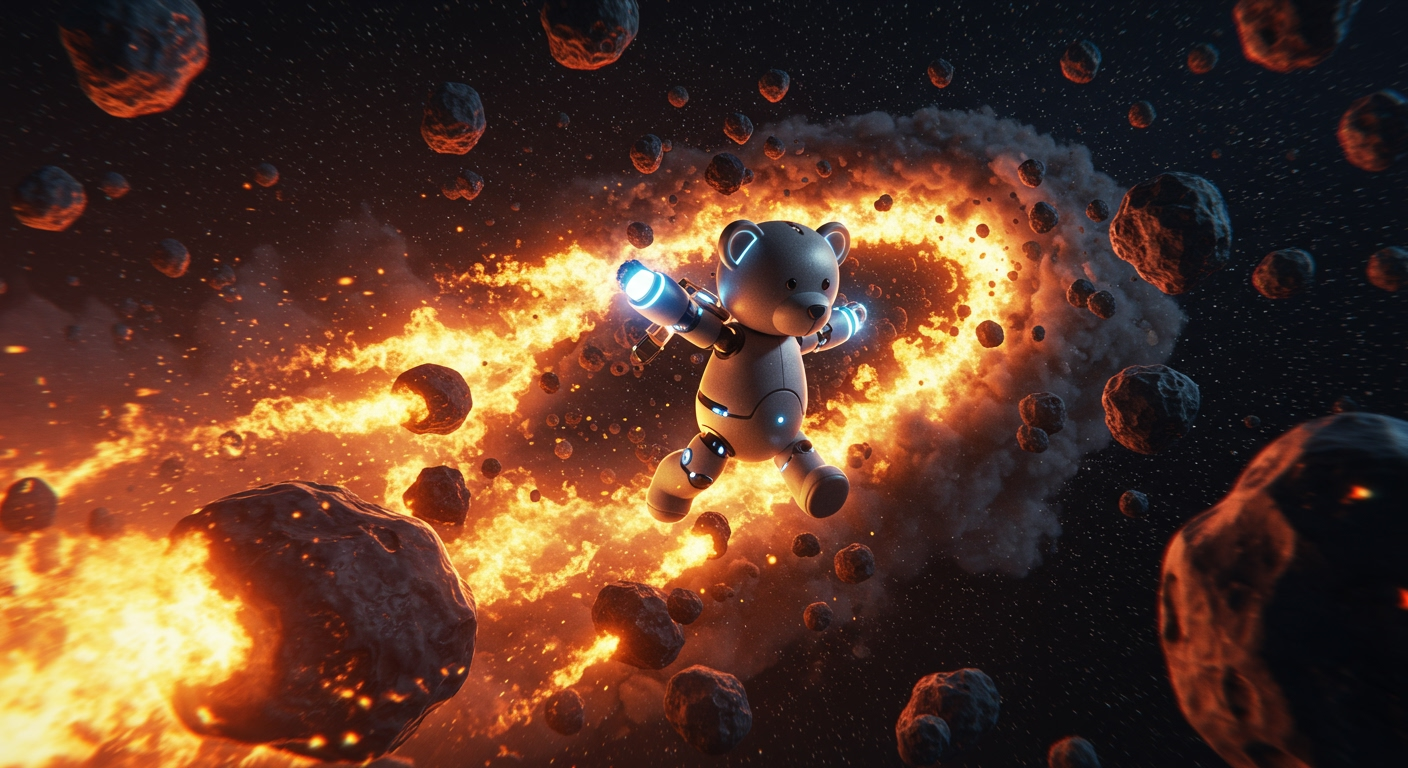

In [ ]:
if not I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab:
  print("Imagen is a paid feature. Please change the variable 'I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab' to True if you are okay with paying to run it.")

else:
  prompt = "A futuristic teddy bear flying in space and dodging the surrounding meteorites passing by."  # @param {type: "string"}

  # Optional parameters
  negative_prompt = "ugly, low quality, static, weird physics" # @param {type: "string"}
  aspect_ratio = "16:9" # @param ["16:9", "9:16"]
  number_of_videos = 1 # @param {type:"slider", min:1, max:4, step:1}
  duration = 8 # @param {type:"slider", min:5, max:8, step:1}


  result = client.models.generate_images(
      model="imagen-3.0-generate-002",
      prompt=prompt,
      config=types.GenerateImagesConfig(
          number_of_images=1,
          output_mime_type="image/jpeg",
          person_generation=person_generation,
          aspect_ratio=aspect_ratio
          #negative_prompt=negativePrompt, # negative prompt is curently only supported by Veo
      )
  )

  result.generated_images[0].image.show()

When you are happy with your image, you can use Veo to make a video out of it.

In [ ]:
if not I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab:
  print("Veo is a paid feature. Please change the variable 'I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab' to True if you are okay with paying to run it.")

else:
  operation = client.models.generate_videos(
      model="veo-2.0-generate-001",
      prompt=prompt,
      image=types.Image(
          image_bytes=result.generated_images[0].image.image_bytes,
          mime_type="image/png"
      ),
      config=types.GenerateVideosConfig(
        # At the moment the config must not be empty
        aspect_ratio=aspect_ratio,  # 16:9 or 9:16
        number_of_videos=number_of_videos, # supported value is 1-2
        negative_prompt=negative_prompt,
        duration_seconds=duration,
      ),
  )

  # Waiting for the video(s) to be generated
  while not operation.done:
      time.sleep(20)
      operation = client.operations.get(operation)
      print(operation)

  print(operation.result.generated_videos)

  for n, generated_video in enumerate(operation.result.generated_videos):
    client.files.download(file=generated_video.video)
    generated_video.video.save(f'video{n}.mp4') # Saves the video(s)
    display(generated_video.video.show()) # Display the video(s) in a notebook

name='models/veo-2.0-generate-001/operations/8hk0r8fz00de' metadata=None done=None error=None response=None result=None
name='models/veo-2.0-generate-001/operations/8hk0r8fz00de' metadata=None done=True error=None response=GenerateVideosResponse(generated_videos=[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/wwp1spcorh5f:download?alt=media, video_bytes=None, mime_type=None))], rai_media_filtered_count=None, rai_media_filtered_reasons=None) result=GenerateVideosResponse(generated_videos=[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/wwp1spcorh5f:download?alt=media, video_bytes=None, mime_type=None))], rai_media_filtered_count=None, rai_media_filtered_reasons=None)
[GeneratedVideo(video=Video(uri=https://generativelanguage.googleapis.com/v1beta/files/wwp1spcorh5f:download?alt=media, video_bytes=None, mime_type=None))]


None

In [ ]:
# To prevent you from running the notebook by mistake
I_am_aware_that_veo_is_a_paid_feature_and_am_OK_with_paying_to_run_this_colab = False

## Next Steps
### Useful API references:

Check the [Veo documentation](https://ai.google.dev/gemini-api/docs/video) and the [prompt guide](https://ai.google.dev/gemini-api/docs/video/veo-prompt-guide) for more details on how to use Veo and best prompt it.

### Related examples

The [Book illustration](../examples/Book_illustration.ipynb) is a nice example on how to mix Gemini long context window with Imagen and Veo asset generation to illustrated a book.

### Continue your discovery of the Gemini API

Here are other cool Gemini features that you might find interesting:
* [Imagen](./Get_started_Imagen.ipynb) can generate images with fine detail, rich lighting, and few distracting artifact from natural language prompts;
* Gemini's [Image-out](./Image-out.ipynb) built-in image output can also generate images and let you iterate on them by chatting with the model;
* Built-in [Audio-out](./Audio-out.ipynb) is also a great multimodal output capability that's quite fun to play with.